In [3]:
#!pip install imblearn

In [4]:
#!pip install torch

In [1]:
import pandas as pd
import io
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, TomekLinks
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [2]:
# importing PyTorch library as 't' for convenience
import torch as t
# importing other necessary libraries
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

### Data Cleaning

In [5]:
df = pd.read_excel("/content/drive/My Drive/Datathon6/C-CHANGE Analysis Data v52c.xlsx")

In [6]:
df.head()

,Patient_ID,Sex,Age,BirthYear,BMI,Obese,Height,Weight,WaistCircumference,sBP,...,CAD_Hx,Stroke_Hx,Smoking_Status,DM_Hx,Hypertension_Hx,Urin_Alb_Creat_Ratio,TC_HDL_Ratio,CVD Risk,CVD_Death,High CVD Risk
0,1001000000000013,F,39,1976,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0
1,1001000000000054,M,66,1949,29.0,0,185.5,99.9,105.0,146.0,...,NaN,NaN,NaN,NaN,1.0,NaN,3.341,22.670272,3.760807,1
2,1001000000000081,F,30,1985,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0
3,1001000000000082,F,62,1953,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0
4,1001000000000090,F,24,1991,26.4,0,181.0,86.6,97.5,127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


For the first table, we want to keep BMI, Obese, sBP, dBP, Smoking_Status, FBS, HDL, LDL, MI_Hx, CAD_Hx, Stroke_Hx, DM_Hx, Hypertension_Hx, Statin_usage, Thiazide_usage, Antihypertensive_usage, AlphaBlocker_usage, BetaBlocker_usage

In [7]:
df.columns

Index(['Patient_ID', 'Sex', 'Age', 'BirthYear', 'BMI', 'Obese', 'Height',
       'Weight', 'WaistCircumference', 'sBP', 'dBP', 'FBS', 'HDL', 'LDL',
       'LDL_CVD Risk', 'LDL-CVDRisk-Statin', 'TC_Age_Sex', 'TC', 'TG', 'INR',
       'DM_HbA1c', 'DM_A1c<6.6', 'HBA1C', 'Any_AntiHTN', 'Any_AntiHTN-HTN',
       'ACE+ARB', 'ACE-or-ARB', 'MI+BB+ACE-or-ARB', 'MI+BB', 'HTN+CAD',
       'HTN+CAD+ACE-or-ARB', 'Diuretic_usage', 'Antihypertensive_usage',
       'Statin_usage', 'DM_Statin', 'DM_ACE/ARB', 'CCB_usage',
       'Thiazide_usage', 'ACEI_usage', 'ARB_usage', 'AlphaBlocker_usage',
       'DihydropyridineCCB_usage', 'Warfarin_usage', 'Antiplatelet_usage',
       'DipyridamoleER_usage', 'Clopidogrel_usage', 'BetaBlocker_usage',
       'Antihyper_Peripher_usage', 'Antihyperglycemics_usage', 'ASA_usage',
       'HeartFailure_Hx', 'AtrialFibrillation_Hx', 'TIA_Hx', 'Dyslipidemia_Hx',
       'BP>160_Macrovasc', 'MacroVasc', 'DM_Macrovasc', 'DM-sBP<130',
       'DM-dBP<80', 'MI_Hx', 'CAD_Hx', 'St

In [8]:
df_selected = df[['BMI', 'Obese', 'sBP', 'dBP', 'Smoking_Status', 'FBS', 'HDL', 'LDL', 'MI_Hx', 'CAD_Hx', 'Stroke_Hx', 'DM_Hx', 'Hypertension_Hx', 'Statin_usage', 'Thiazide_usage', 'Antihypertensive_usage', 'AlphaBlocker_usage', 'BetaBlocker_usage']]

In [9]:
df_selected.head()

,BMI,Obese,sBP,dBP,Smoking_Status,FBS,HDL,LDL,MI_Hx,CAD_Hx,Stroke_Hx,DM_Hx,Hypertension_Hx,Statin_usage,Thiazide_usage,Antihypertensive_usage,AlphaBlocker_usage,BetaBlocker_usage
0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29.0,0,146.0,89.0,NaN,NaN,0.91,1.63,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26.4,0,127.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_half = pd.read_excel("/content/drive/My Drive/Datathon6/C-CHANGE Analysis Data v52c.xlsx", sheet_name='Framingham')

For the second table, we want to keep age, male, family_hx and diabetes

In [11]:
df_half_selected = df_half[['age', 'male', 'family_hx', 'diabetes']]

In [12]:
df_half_selected.head()

,age,male,family_hx,diabetes
0,39,0,0,0
1,66,1,0,0
2,30,0,0,0
3,62,0,0,0
4,24,0,0,0


In [13]:
df_half.columns

Index(['timeperiod', 'age', 'male', 'cigarettes', 'smoker', 'family_hx',
       'diabetes', 'lvh', 'systolic_bp', 'total_chol', 'hdl_chol', 'CHD', 'MI',
       'STROKE', 'CVD', 'CHD_DEATH', 'CVD_DEATH', 'BNF', 'BP', 'TC', 'HDL',
       'All', 'Any', 'M>39,F>49', 'Agecriteria_All'],
      dtype='object')

In [14]:
df_half.head()

,timeperiod,age,male,cigarettes,smoker,family_hx,diabetes,lvh,systolic_bp,total_chol,...,CHD_DEATH,CVD_DEATH,BNF,BP,TC,HDL,All,Any,"M>39,F>49",Agecriteria_All
0,10,39,0,0,0,0,0,0,0.0,0.00,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,10,66,1,0,0,0,0,0,146.0,3.04,...,3.760807,5.9715,18.278335,1,1,1,1,1,1,1
2,10,30,0,0,0,0,0,0,0.0,0.00,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,10,62,0,0,0,0,0,0,0.0,0.00,...,NaN,NaN,NaN,0,0,0,0,0,1,0
4,10,24,0,0,0,0,0,0,127.0,0.00,...,NaN,NaN,NaN,1,0,0,0,1,0,0


In [15]:
df.shape

(976147, 70)

In [16]:
df_half.shape

(976147, 25)

In [17]:
df_uncleaned = pd.concat([df_selected, df_half_selected], axis=1, join='inner')

In [18]:
df_uncleaned.head()

,BMI,Obese,sBP,dBP,Smoking_Status,FBS,HDL,LDL,MI_Hx,CAD_Hx,...,Hypertension_Hx,Statin_usage,Thiazide_usage,Antihypertensive_usage,AlphaBlocker_usage,BetaBlocker_usage,age,male,family_hx,diabetes
0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39,0,0,0
1,29.0,0,146.0,89.0,NaN,NaN,0.91,1.63,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,66,1,0,0
2,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30,0,0,0
3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,62,0,0,0
4,26.4,0,127.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,24,0,0,0


In [19]:
df_uncleaned.shape

(976147, 22)

In [20]:
# Check for missing values in the dataset,
print(df_uncleaned.isna().sum())

BMI                       695019
Obese                          0
sBP                       481057
dBP                       481704
Smoking_Status            974356
FBS                       751140
HDL                       697516
LDL                       700850
MI_Hx                     967935
CAD_Hx                    971439
Stroke_Hx                 975568
DM_Hx                     901554
Hypertension_Hx           823545
Statin_usage              937217
Thiazide_usage            950562
Antihypertensive_usage    974320
AlphaBlocker_usage        974701
BetaBlocker_usage         957362
age                            0
male                           0
family_hx                      0
diabetes                       0
dtype: int64


### Fill in with missing values

In [21]:
# get all the columns that needed to be filled in with median value
selected_col = ['BMI', 'sBP', 'dBP', 'FBS', 'HDL', 'LDL']
df_uncleaned.update(df_uncleaned[selected_col].fillna(df_uncleaned[selected_col].median()))

# get all the columns that needed to be filled in with 0 value
selected_col2 = ['Smoking_Status', 'MI_Hx', 'CAD_Hx', 'Stroke_Hx', 'DM_Hx', 'Hypertension_Hx', 'Statin_usage',
                 'Thiazide_usage', 'Antihypertensive_usage', 'AlphaBlocker_usage', 'BetaBlocker_usage']
df_uncleaned.update(df_uncleaned[selected_col2].fillna(0))

In [22]:
df_uncleaned

,BMI,Obese,sBP,dBP,Smoking_Status,FBS,HDL,LDL,MI_Hx,CAD_Hx,...,Hypertension_Hx,Statin_usage,Thiazide_usage,Antihypertensive_usage,AlphaBlocker_usage,BetaBlocker_usage,age,male,family_hx,diabetes
0,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,39,0,0,0
1,29.0,0,146.0,89.0,0.0,5.2,0.91,1.63,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,66,1,0,0
2,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30,0,0,0
3,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,62,0,0,0
4,26.4,0,127.0,78.0,0.0,5.2,1.34,2.74,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976142,54.5,1,152.0,87.0,0.0,5.2,1.34,2.74,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,45,1,0,0
976143,27.9,0,120.0,66.0,0.0,5.2,1.34,2.74,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,38,0,0,0
976144,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,64,1,0,0
976145,26.0,0,150.0,74.0,0.0,5.2,1.34,2.74,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,48,1,0,0


In [23]:
df_uncleaned[selected_col].median()

BMI     27.20
sBP    122.00
dBP     76.00
FBS      5.20
HDL      1.34
LDL      2.74
dtype: float64

In [24]:
df_uncleaned.describe()

,BMI,Obese,sBP,dBP,Smoking_Status,FBS,HDL,LDL,MI_Hx,CAD_Hx,...,Hypertension_Hx,Statin_usage,Thiazide_usage,Antihypertensive_usage,AlphaBlocker_usage,BetaBlocker_usage,age,male,family_hx,diabetes
count,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000,...,976147.000000,976147.000000,976147.00000,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000,976147.0,976147.000000
mean,27.568532,0.093564,122.907375,75.857514,0.001832,5.308219,1.360492,2.752689,0.008413,0.004823,...,0.156331,0.039881,0.02621,0.001872,0.001481,0.019244,46.449630,0.434199,0.0,0.076416
std,3.903950,0.291221,11.317340,7.092484,0.042759,0.844226,0.225398,0.488972,0.091334,0.069280,...,0.363169,0.195680,0.15976,0.043222,0.038460,0.137382,16.644409,0.495652,0.0,0.265662
min,10.000000,0.000000,50.000000,50.000000,0.000000,3.500000,0.600000,0.700000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,18.000000,0.000000,0.0,0.000000
25%,27.200000,0.000000,122.000000,76.000000,0.000000,5.200000,1.340000,2.740000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,32.000000,0.000000,0.0,0.000000
50%,27.200000,0.000000,122.000000,76.000000,0.000000,5.200000,1.340000,2.740000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,46.000000,0.000000,0.0,0.000000
75%,27.200000,0.000000,123.000000,76.000000,0.000000,5.200000,1.340000,2.740000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,60.000000,1.000000,0.0,0.000000
max,198.000000,1.000000,253.000000,189.000000,1.000000,25.000000,3.000000,8.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,80.000000,1.000000,0.0,1.000000


In [25]:
df_cleaned_features = ['age', 'male', 'BMI', 'Obese', 'sBP', 'dBP', 'Smoking_Status', 'FBS', 'HDL', 'LDL',
                       'MI_Hx', 'CAD_Hx', 'Stroke_Hx', 'DM_Hx', 'Hypertension_Hx', 'Statin_usage',
                       'Thiazide_usage', 'Antihypertensive_usage', 'AlphaBlocker_usage', 'BetaBlocker_usage',
                       'diabetes']
df_uncleaned = df_uncleaned[df_cleaned_features]
df_uncleaned.rename(columns={'male': 'gender'}, inplace=True)

In [26]:
df_uncleaned.head()

,age,gender,BMI,Obese,sBP,dBP,Smoking_Status,FBS,HDL,LDL,...,CAD_Hx,Stroke_Hx,DM_Hx,Hypertension_Hx,Statin_usage,Thiazide_usage,Antihypertensive_usage,AlphaBlocker_usage,BetaBlocker_usage,diabetes
0,39,0,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,66,1,29.0,0,146.0,89.0,0.0,5.2,0.91,1.63,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
2,30,0,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,62,0,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,24,0,26.4,0,127.0,78.0,0.0,5.2,1.34,2.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [27]:
print(df_uncleaned.isna().sum())

age                       0
gender                    0
BMI                       0
Obese                     0
sBP                       0
dBP                       0
Smoking_Status            0
FBS                       0
HDL                       0
LDL                       0
MI_Hx                     0
CAD_Hx                    0
Stroke_Hx                 0
DM_Hx                     0
Hypertension_Hx           0
Statin_usage              0
Thiazide_usage            0
Antihypertensive_usage    0
AlphaBlocker_usage        0
BetaBlocker_usage         0
diabetes                  0
dtype: int64


In [28]:
# Here, we need to dealing with
columns_to_add = ['Statin_usage', 'Thiazide_usage', 'Antihypertensive_usage', 'AlphaBlocker_usage',
                  'BetaBlocker_usage']

df_uncleaned['drug_usage'] = df_uncleaned[columns_to_add].sum(axis=1)
df_uncleaned['drug_usage'] = df_uncleaned['drug_usage'].apply(lambda x: 1 if x > 1 else x)

In [29]:
df_uncleaned.describe()

,age,gender,BMI,Obese,sBP,dBP,Smoking_Status,FBS,HDL,LDL,...,Stroke_Hx,DM_Hx,Hypertension_Hx,Statin_usage,Thiazide_usage,Antihypertensive_usage,AlphaBlocker_usage,BetaBlocker_usage,diabetes,drug_usage
count,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000,...,976147.000000,976147.000000,976147.000000,976147.000000,976147.00000,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000
mean,46.449630,0.434199,27.568532,0.093564,122.907375,75.857514,0.001832,5.308219,1.360492,2.752689,...,0.000593,0.076416,0.156331,0.039881,0.02621,0.001872,0.001481,0.019244,0.076416,0.064826
std,16.644409,0.495652,3.903950,0.291221,11.317340,7.092484,0.042759,0.844226,0.225398,0.488972,...,0.024347,0.265662,0.363169,0.195680,0.15976,0.043222,0.038460,0.137382,0.265662,0.246219
min,18.000000,0.000000,10.000000,0.000000,50.000000,50.000000,0.000000,3.500000,0.600000,0.700000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,27.200000,0.000000,122.000000,76.000000,0.000000,5.200000,1.340000,2.740000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,0.000000,27.200000,0.000000,122.000000,76.000000,0.000000,5.200000,1.340000,2.740000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,1.000000,27.200000,0.000000,123.000000,76.000000,0.000000,5.200000,1.340000,2.740000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,1.000000,198.000000,1.000000,253.000000,189.000000,1.000000,25.000000,3.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df_uncleaned = df_uncleaned.drop(columns=columns_to_add)

In [31]:
df_uncleaned

,age,gender,BMI,Obese,sBP,dBP,Smoking_Status,FBS,HDL,LDL,MI_Hx,CAD_Hx,Stroke_Hx,DM_Hx,Hypertension_Hx,diabetes,drug_usage
0,39,0,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0,0.0
1,66,1,29.0,0,146.0,89.0,0.0,5.2,0.91,1.63,1.0,0.0,0.0,0.0,1.0,0,1.0
2,30,0,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0,0.0
3,62,0,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0,0.0
4,24,0,26.4,0,127.0,78.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976142,45,1,54.5,1,152.0,87.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0,0.0
976143,38,0,27.9,0,120.0,66.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0,0.0
976144,64,1,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0,0.0
976145,48,1,26.0,0,150.0,74.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0,0.0


In [32]:
df_cleaned = df_uncleaned[['age', 'gender', 'BMI', 'Obese', 'sBP', 'dBP', 'Smoking_Status',
                          'FBS', 'HDL', 'LDL', 'MI_Hx', 'CAD_Hx', 'Stroke_Hx',
                          'Hypertension_Hx', 'drug_usage', 'diabetes']]


In [33]:
df_cleaned

,age,gender,BMI,Obese,sBP,dBP,Smoking_Status,FBS,HDL,LDL,MI_Hx,CAD_Hx,Stroke_Hx,Hypertension_Hx,drug_usage,diabetes
0,39,0,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0
1,66,1,29.0,0,146.0,89.0,0.0,5.2,0.91,1.63,1.0,0.0,0.0,1.0,1.0,0
2,30,0,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0
3,62,0,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0
4,24,0,26.4,0,127.0,78.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976142,45,1,54.5,1,152.0,87.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0
976143,38,0,27.9,0,120.0,66.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0
976144,64,1,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0
976145,48,1,26.0,0,150.0,74.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0


In [86]:
import plotly.express as px
import pandas as pd
counts = df_cleaned['diabetes'].value_counts()

# Define your color sequence
colors = ['#1c3a73', '#7cb1c2']

fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # size of the hole, 0.5 means 50%
    title='Distribution of Classes in "Class/ASD"',
    color_discrete_sequence=colors  # apply your colors here
)

# Update layout for better appearance
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),  # Adjust top margin to make room for title
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Class/ASD'
    ),
    title=dict(
        text='Distribution of Classes in "diabetes"',
        x=0.45,  # Centering the title
        xanchor='center',
        y=0.95,  # Adjusting y position to place title above chart
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

fig.show()

### Heatmap for the cleaned dataset

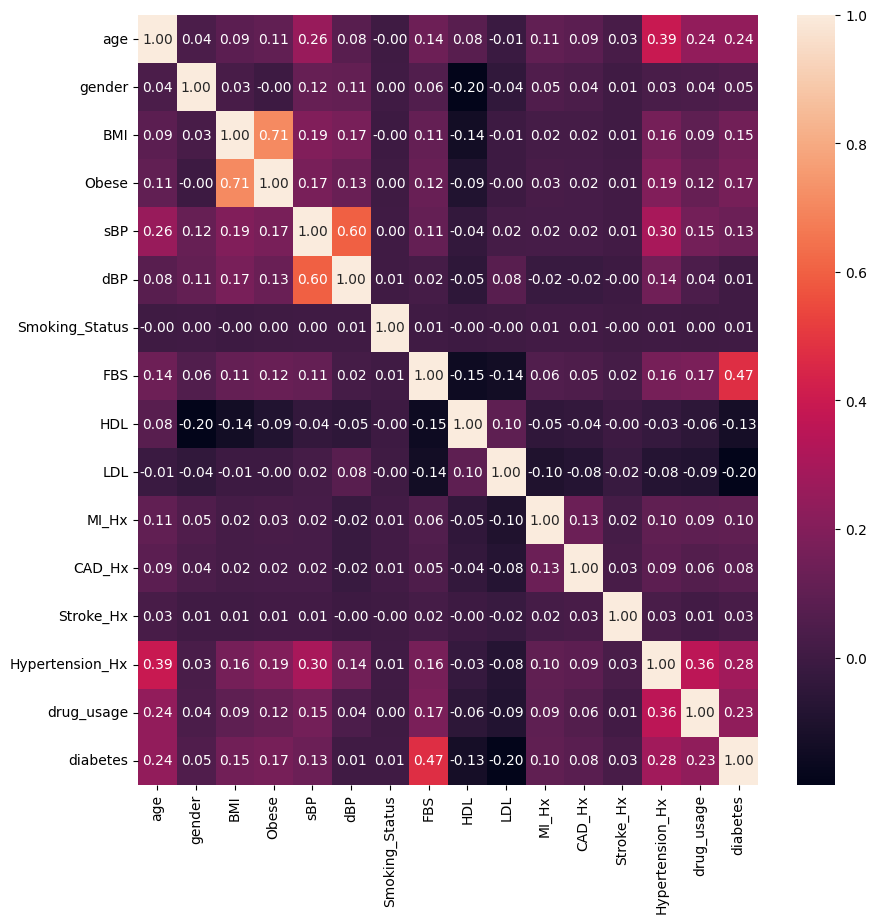

In [34]:
# We want to check the correlation between 2 different features especially with the response variable diabetes.
correlation = df_cleaned.corr()
seaborn.heatmap (correlation, annot = True, fmt=".2f")
plt.gcf().set_size_inches(10, 10)

The problem is that the dataset is highly inbalanced, we get only 74593 patients have diabetes, but the total number of the patients in the cleaned dataset is 976147, which is much larger compared with 74593.
Here, three different techiques are implemented to resolve this issue.

1. Penalize Algorithms: During training, we can use the argument class_weight=’balanced’ to penalize mistakes on the minority class.
2. Use undersampling technique: NearMiss, TomekLinks
3. Use oversampling technique: SMOTE

Ensuring a high level of prediction accuracy is crucial, and we have employed three distinct approaches to address the data imbalance in order to achieve an optimal model.

In second Phrase, we primarily focused on the first method.

#### Logistic Regression

In [41]:
# 1. Penalize Algorithms
X = df_cleaned.drop('diabetes', axis = 1)
y = df_cleaned['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Upsampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', class_weight='balanced')
log_reg.fit(X_resampled, y_resampled)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [42]:
# Use the model to make predictions on the training data
y_pred = log_reg.predict(X_resampled)

# Evaluate the model
conf_matrix = confusion_matrix(y_resampled, y_pred)
class_report = classification_report(y_resampled, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[625409  95889]
 [175065 546233]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82    721298
           1       0.85      0.76      0.80    721298

    accuracy                           0.81   1442596
   macro avg       0.82      0.81      0.81   1442596
weighted avg       0.82      0.81      0.81   1442596



In [43]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[156315  23941]
 [  3679  11295]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92    180256
           1       0.32      0.75      0.45     14974

    accuracy                           0.86    195230
   macro avg       0.65      0.81      0.68    195230
weighted avg       0.93      0.86      0.88    195230



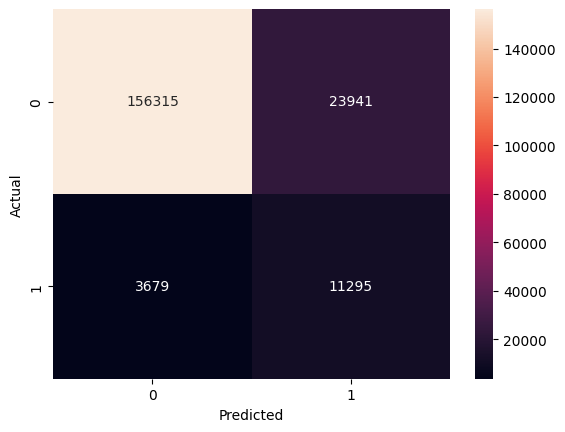

In [44]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [45]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1','l2']}
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced')
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)
print(grid_search.best_params_)

{'C': 0.01, 'penalty': 'l2'}


In [46]:
# Use the optimal model to make predictions on the testing data
y_pred = grid_search.predict(X_resampled)

# Evaluate the model
conf_matrix = confusion_matrix(y_resampled, y_pred)
class_report = classification_report(y_resampled, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[625379  95919]
 [175044 546254]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82    721298
           1       0.85      0.76      0.80    721298

    accuracy                           0.81   1442596
   macro avg       0.82      0.81      0.81   1442596
weighted avg       0.82      0.81      0.81   1442596



In [47]:
# Use the optimal model to make predictions on the testing data
y_pred = grid_search.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[156313  23943]
 [  3678  11296]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92    180256
           1       0.32      0.75      0.45     14974

    accuracy                           0.86    195230
   macro avg       0.65      0.81      0.68    195230
weighted avg       0.93      0.86      0.88    195230



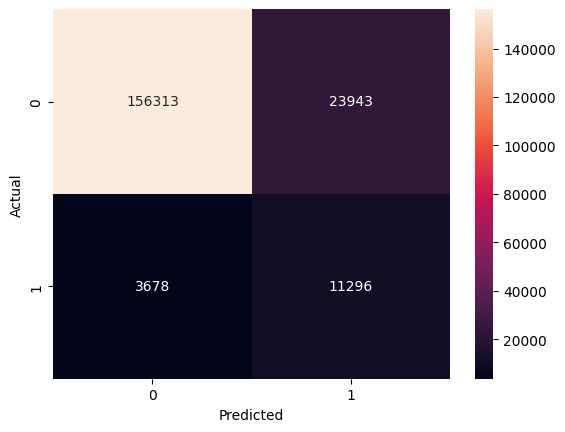

In [48]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Bernoulli Naive Bayes

In [49]:
# Create a BernoulliNB classifier
clf = BernoulliNB(alpha=1.0, binarize=0.5, fit_prior=True, class_prior=None)
# Fit the classifier on training data
clf.fit(X_resampled, y_resampled)
# Predict on test data
y_pred = clf.predict(X_test)

In [52]:
# Use the model to make predictions on the testing data
y_pred = clf.predict(X_resampled)

# Evaluate the model
conf_matrix = confusion_matrix(y_resampled, y_pred)
class_report = classification_report(y_resampled, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[584970 136328]
 [168032 553266]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79    721298
           1       0.80      0.77      0.78    721298

    accuracy                           0.79   1442596
   macro avg       0.79      0.79      0.79   1442596
weighted avg       0.79      0.79      0.79   1442596



In [53]:
# Use the model to make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[146276  33980]
 [  3471  11503]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89    180256
           1       0.25      0.77      0.38     14974

    accuracy                           0.81    195230
   macro avg       0.61      0.79      0.63    195230
weighted avg       0.92      0.81      0.85    195230



In [54]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'binarize': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
clf = BernoulliNB(fit_prior=True, class_prior=None)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)
print(grid_search.best_params_)

{'alpha': 100, 'binarize': 0.6}


In [56]:
# Use the optimal model to make predictions on the traning data
y_pred = grid_search.predict(X_resampled)

# Evaluate the model
conf_matrix = confusion_matrix(y_resampled, y_pred)
class_report = classification_report(y_resampled, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[593986 127312]
 [167683 553615]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80    721298
           1       0.81      0.77      0.79    721298

    accuracy                           0.80   1442596
   macro avg       0.80      0.80      0.80   1442596
weighted avg       0.80      0.80      0.80   1442596



In [55]:
# Use the optimal model to make predictions on the testing data
y_pred = grid_search.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[148343  31913]
 [  3533  11441]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89    180256
           1       0.26      0.76      0.39     14974

    accuracy                           0.82    195230
   macro avg       0.62      0.79      0.64    195230
weighted avg       0.92      0.82      0.85    195230



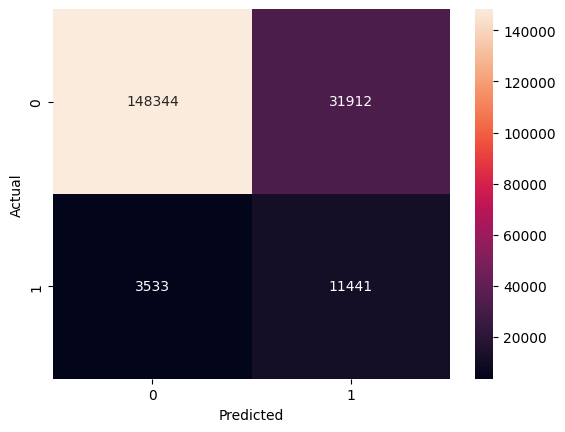

In [62]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

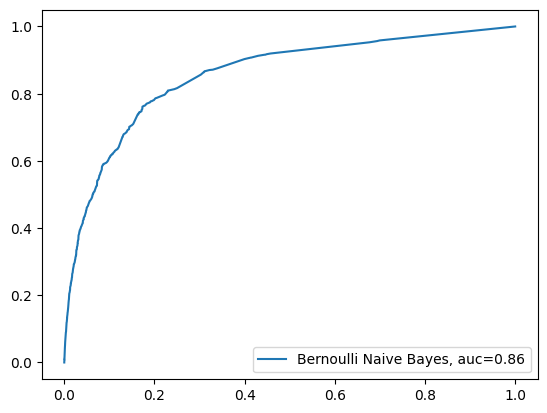

In [57]:
y_pred_proba = grid_search.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Naive Bayes')
plt.plot(fpr,tpr,label="Bernoulli Naive Bayes, auc="+str(round(auc,2)))
plt.legend(loc=4)
plt.show()

We knew that each features have a completely different covariance, so we also showed a great interest in constructing a QDA model.

#### QDA

In [58]:
# Training the QDA model on numerical columns of the training data
m = QuadraticDiscriminantAnalysis()
# Fit the classifier on training data
m.fit(X_resampled, y_resampled)
# Predict on test data
y_pred = m.predict(X_test)

In [59]:
# Use the model to make predictions on the training data
y_pred = m.predict(X_resampled)

# Evaluate the model
conf_matrix = confusion_matrix(y_resampled, y_pred)
class_report = classification_report(y_resampled, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[650082  71216]
 [270617 450681]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.90      0.79    721298
           1       0.86      0.62      0.73    721298

    accuracy                           0.76   1442596
   macro avg       0.78      0.76      0.76   1442596
weighted avg       0.78      0.76      0.76   1442596



In [60]:
# Use the model to make predictions on the testing data
y_pred = m.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[162318  17938]
 [  5485   9489]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93    180256
           1       0.35      0.63      0.45     14974

    accuracy                           0.88    195230
   macro avg       0.66      0.77      0.69    195230
weighted avg       0.92      0.88      0.90    195230



In [61]:
param_grid = {'reg_param': (0.00001, 0.0001, 0.001,0.01, 0.1),
    'store_covariance': (True, False),
    'tol': (0.0001, 0.001,0.01, 0.1)}
m = QuadraticDiscriminantAnalysis()
grid_search = GridSearchCV(m, param_grid, cv=5, scoring='f1')
grid_search.fit(X_resampled, y_resampled)
print(grid_search.best_params_)

{'reg_param': 0.001, 'store_covariance': True, 'tol': 0.0001}


In [62]:
# Use the optimal model to make predictions on the testing data
y_pred = grid_search.predict(X_resampled)

# Evaluate the model
conf_matrix = confusion_matrix(y_resampled, y_pred)
class_report = classification_report(y_resampled, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[650205  71093]
 [270699 450599]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.90      0.79    721298
           1       0.86      0.62      0.73    721298

    accuracy                           0.76   1442596
   macro avg       0.78      0.76      0.76   1442596
weighted avg       0.78      0.76      0.76   1442596



In [63]:
# Use the optimal model to make predictions on the testing data
y_pred = grid_search.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[162342  17914]
 [  5494   9480]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93    180256
           1       0.35      0.63      0.45     14974

    accuracy                           0.88    195230
   macro avg       0.66      0.77      0.69    195230
weighted avg       0.92      0.88      0.90    195230



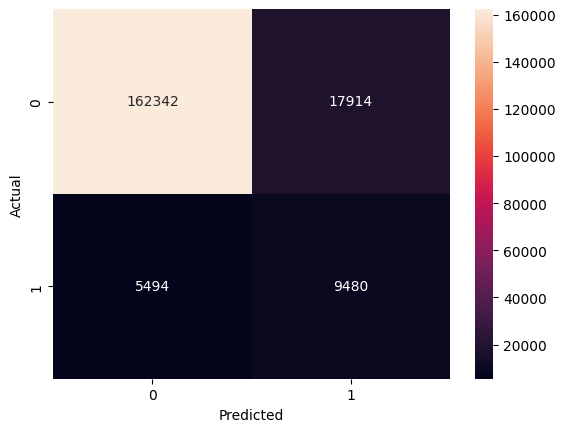

In [64]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [65]:
print('The result for QDA is:')
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

The result for QDA is:
Accuracy: 0.880100
Precision: 0.346061
Recall: 0.633097
F1 score: 0.447508


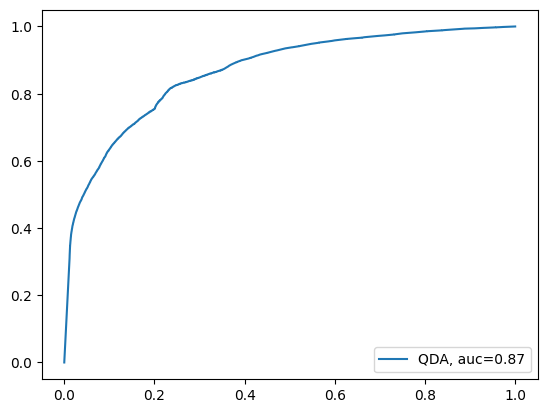

In [66]:
y_pred_proba = grid_search.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='QDA')
plt.plot(fpr,tpr,label="QDA, auc="+str(round(auc,2)))
plt.legend(loc=4)
plt.show()

#### Decision Tree

In [67]:
# Initializing a Decision Tree classifier
dt = tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced')
# Fit the classifier on training data
dt.fit(X_resampled, y_resampled)
# Predict on test data
y_pred = dt.predict(X_test)

In [68]:
# Use the model to make predictions on the training data
y_pred = dt.predict(X_resampled)

# Evaluate the model
conf_matrix = confusion_matrix(y_resampled, y_pred)
class_report = classification_report(y_resampled, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[706775  14523]
 [ 66130 655168]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95    721298
           1       0.98      0.91      0.94    721298

    accuracy                           0.94   1442596
   macro avg       0.95      0.94      0.94   1442596
weighted avg       0.95      0.94      0.94   1442596



In [69]:
# Use the model to make predictions on the testing data
y_pred = dt.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[168265  11991]
 [  7153   7821]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95    180256
           1       0.39      0.52      0.45     14974

    accuracy                           0.90    195230
   macro avg       0.68      0.73      0.70    195230
weighted avg       0.92      0.90      0.91    195230



In [70]:
param_grid = {"max_depth" : [5, 10, 15, 20 ,25, 30, 35],
    "min_samples_leaf" : [5, 10, 15, 20 ,25],
    "splitter" : ['best', 'random'],
    "max_features" : ['sqrt', 'log2']}
# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)
dt = tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced')
grid_search = GridSearchCV(dt, param_grid, cv=skf, scoring='f1')
grid_search.fit(X_resampled, y_resampled)
print(grid_search.best_params_)

{'max_depth': 35, 'max_features': 'log2', 'min_samples_leaf': 5, 'splitter': 'best'}


In [71]:
# Use the optimal model to make predictions on the training data
y_pred = grid_search.predict(X_resampled)

# Evaluate the model
conf_matrix = confusion_matrix(y_resampled, y_pred)
class_report = classification_report(y_resampled, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[665516  55782]
 [121244 600054]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88    721298
           1       0.91      0.83      0.87    721298

    accuracy                           0.88   1442596
   macro avg       0.88      0.88      0.88   1442596
weighted avg       0.88      0.88      0.88   1442596



In [72]:
# Use the optimal model to make predictions on the testing data
y_pred = grid_search.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[162448  17808]
 [  5450   9524]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93    180256
           1       0.35      0.64      0.45     14974

    accuracy                           0.88    195230
   macro avg       0.66      0.77      0.69    195230
weighted avg       0.92      0.88      0.90    195230



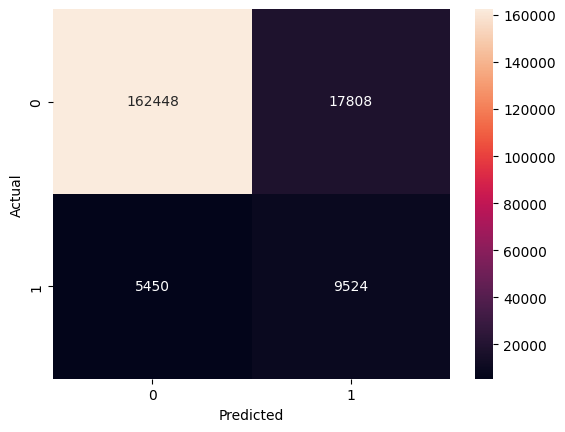

In [73]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

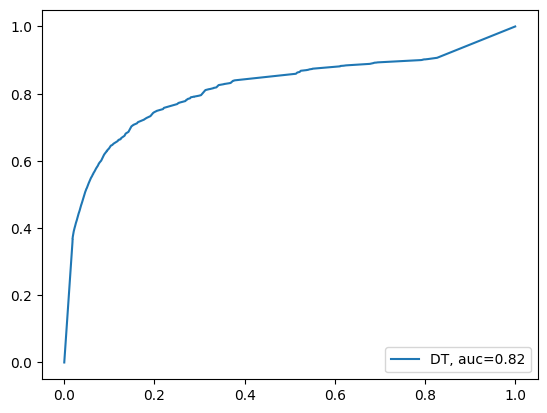

In [74]:
y_pred_proba = grid_search.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='decision tree')
plt.plot(fpr,tpr,label="DT, auc="+str(round(auc,2)))
plt.legend(loc=4)
plt.show()

#### Random Forest

In [75]:
# Initialize a Random Forest classifier
# The criterion 'entropy' measures the quality of a split by how mixed the classes are in two groups
# class_weight 'balanced_subsample' is used to handle imbalanced classes. It computes weights based on the bootstrap sample for every tree grown.
# oob_score is set to True to use out-of-bag samples to estimate the generalization accuracy
rf = RandomForestClassifier(criterion='entropy', class_weight='balanced_subsample', oob_score=True)
# Fit the classifier on training data
rf.fit(X_resampled, y_resampled)
# Predict on test data
y_pred = rf.predict(X_test)

In [76]:
# Use the model to make predictions on the traning data
y_pred = rf.predict(X_resampled)

# Evaluate the model
conf_matrix = confusion_matrix(y_resampled, y_pred)
class_report = classification_report(y_resampled, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[706356  14942]
 [ 65714 655584]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95    721298
           1       0.98      0.91      0.94    721298

    accuracy                           0.94   1442596
   macro avg       0.95      0.94      0.94   1442596
weighted avg       0.95      0.94      0.94   1442596



In [77]:
# Use the model to make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[170528   9728]
 [  6194   8780]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    180256
           1       0.47      0.59      0.52     14974

    accuracy                           0.92    195230
   macro avg       0.72      0.77      0.74    195230
weighted avg       0.93      0.92      0.92    195230



In [78]:
param_grid = {
    "max_depth" : [10, 15],
    "min_samples_leaf" : [15, 20]}
# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=3)
rf = RandomForestClassifier(criterion='entropy', class_weight='balanced_subsample', oob_score=True)
grid_search = GridSearchCV(rf, param_grid, cv=skf, scoring='f1')
grid_search.fit(X_resampled, y_resampled)
print(grid_search.best_params_)

{'max_depth': 15, 'min_samples_leaf': 15}


In [79]:
# Use the optimal model to make predictions on the training data
y_pred = grid_search.predict(X_resampled)

# Evaluate the model
conf_matrix = confusion_matrix(y_resampled, y_pred)
class_report = classification_report(y_resampled, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[638207  83091]
 [128226 593072]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86    721298
           1       0.88      0.82      0.85    721298

    accuracy                           0.85   1442596
   macro avg       0.85      0.85      0.85   1442596
weighted avg       0.85      0.85      0.85   1442596



In [81]:
# Use the optimal model to make predictions on the testing data
y_pred = grid_search.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[158986  21270]
 [  3685  11289]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93    180256
           1       0.35      0.75      0.47     14974

    accuracy                           0.87    195230
   macro avg       0.66      0.82      0.70    195230
weighted avg       0.93      0.87      0.89    195230



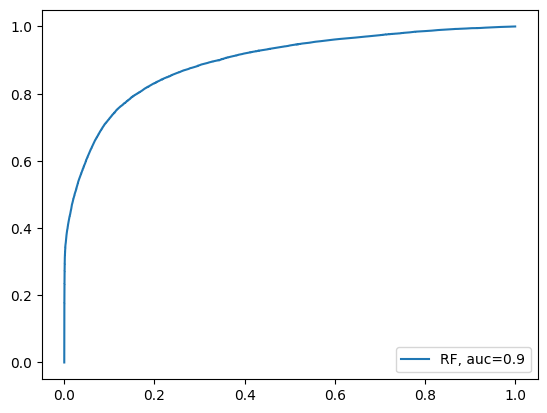

In [80]:
y_pred_proba = grid_search.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='random forest')
plt.plot(fpr,tpr,label="RF, auc="+str(round(auc,2)))
plt.legend(loc=4)
plt.show()

Since, we are still in an early phrase. Here, we only implemented QDA for uppersampling and downsampling model.

RNN

In [82]:
selected_features = ['age', 'gender', 'BMI', 'Obese', 'sBP', 'dBP', 'Smoking_Status',
                          'FBS', 'HDL', 'LDL', 'MI_Hx', 'CAD_Hx', 'Stroke_Hx',
                          'Hypertension_Hx', 'drug_usage']

In [92]:
# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 5
hidden_units_layer_2 = 5

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((21, hidden_units_layer_1), requires_grad=True)
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the output layer
W3 = t.randn((hidden_units_layer_2, 1), requires_grad=True)
B3 = t.zeros((1, 1), requires_grad=True)

In [88]:
# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with tanh activation
    out = tanh(input @ W1 + B1)

    # Second hidden layer with tanh activation
    out = tanh(out @ W2 + B2)

    # Output layer with sigmoid activation (since it's a binary classification problem)
    out = sigmoid(out @ W3 + B3)
    return out

In [ ]:
# Convert the training data to PyTorch tensors
X = t.tensor(X_resampled).type(t.float32)
Y = t.tensor(y_resampled).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 1000
learning_rate = 0.01
batch_size = 1000

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

In [83]:
# Defining the parameters
number_of_input_features = 15
number_of_hidden_units = 10
epochs = 100
learning_rate = 0.001
batch_size = 256

# Loading and preprocessing the data
X_train_tensor = t.Tensor(X_resampled).type(t.float32)
Y_train_tensor = t.Tensor(y_resampled).type(t.float32)

X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(y_test).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Creating a neural network model
model = Sequential(
    Linear(number_of_input_features, number_of_hidden_units),
    Tanh(),
    Linear(number_of_hidden_units, 1),
    Sigmoid()
)

# Setting up the optimizer and loss function
optimizer = Adam(model.parameters(), lr=learning_rate)
loss_fn = t.nn.BCELoss()

# Lists to store accuracy values during training
train_accuracy_list = []
validation_accuracy_list = []

# Main training loop
for epoch in range(epochs):
    # Learning rate scheduling (optional)
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        probs = model(X)

        # new loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y)

        per_epoch_loss_list.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with t.no_grad():
        # Calculate accuracy on train data
        model.eval()
        probs = model(X_train_tensor)
        prediction_train = (probs >= .5).type(t.LongTensor).view(-1)

        train_accuracy = (prediction_train == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction_test = (probs > .5).type(t.LongTensor).view(-1)

        validation_accuracy = (prediction_test == Y_test_tensor).type(t.float32).mean().item()

        print(f'epoch {epoch}/{epochs} ---> train_accuracy : {train_accuracy} , validation_accuracy : {validation_accuracy}')
        model.train()
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

epoch 0/100 ---> train_accuracy : 0.8183885216712952 , validation_accuracy : 0.8461096882820129
epoch 1/100 ---> train_accuracy : 0.8188107013702393 , validation_accuracy : 0.8456180095672607
epoch 2/100 ---> train_accuracy : 0.8192626237869263 , validation_accuracy : 0.8491881489753723
epoch 3/100 ---> train_accuracy : 0.8195669651031494 , validation_accuracy : 0.8515340685844421
epoch 4/100 ---> train_accuracy : 0.8193985223770142 , validation_accuracy : 0.8477334380149841
epoch 5/100 ---> train_accuracy : 0.8194068074226379 , validation_accuracy : 0.8482559323310852
epoch 6/100 ---> train_accuracy : 0.8194255232810974 , validation_accuracy : 0.8454182147979736
epoch 7/100 ---> train_accuracy : 0.8197575807571411 , validation_accuracy : 0.8488757014274597
epoch 8/100 ---> train_accuracy : 0.8198802471160889 , validation_accuracy : 0.8476976156234741
epoch 9/100 ---> train_accuracy : 0.8197492361068726 , validation_accuracy : 0.8473851084709167
epoch 10/100 ---> train_accuracy : 0.820

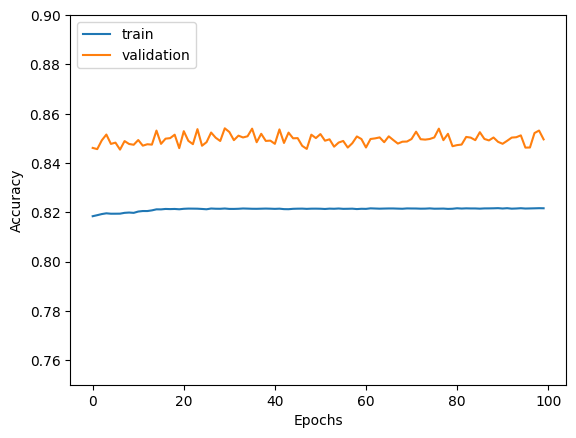

In [84]:
# Plotting the training and validation accuracy
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label='validation')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.75, 0.9])
plt.show()